## ASTR622 Interstellar Medium Problem Set 3
### explore the ALMA PHANGS NGC4321 data cube of 12CO

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# basic modules for reading data and plotting images
from astropy.io import ascii, fits
from astropy.wcs import WCS
from astropy.visualization import (ImageNormalize, MinMaxInterval, SqrtStretch, LogStretch, AsinhStretch)

### read in the data and examine header

In [3]:
# read in the fits file and get some basic information
hdu = fits.open('ngc4321_12m+7m+tp_co21_2as.fits')
hdu.info()

Filename: ngc4321_12m+7m+tp_co21_2as.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      65   (594, 529, 163)   float32   


In [4]:
# create data array and header
im = hdu[0].data
hd = hdu[0].header

In [5]:
# look at the header
# note its RA-DEC-velocity in deg, deg, m/s
# and units of K for antenna temperature (equivalent to intensity)
hd

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  594                                                  
NAXIS2  =                  529                                                  
NAXIS3  =                  163                                                  
BMAJ    = 0.000555555555555555                                                  
BMIN    = 0.000555555555555555                                                  
BPA     =                  0.0                                                  
BTYPE   = 'Intensity'                                                           
OBJECT  = 'NGC4321 '                                                            
BUNIT   = 'K       '           /Brightness (pixel) unit                         
ALTRVAL =   2.293293265556E+

### plot a map of the peak temperature

In [6]:
# get the peak value at each ra-dec position (note that velocity is axis 0 of the python array)
peak = np.max(im, axis=0)

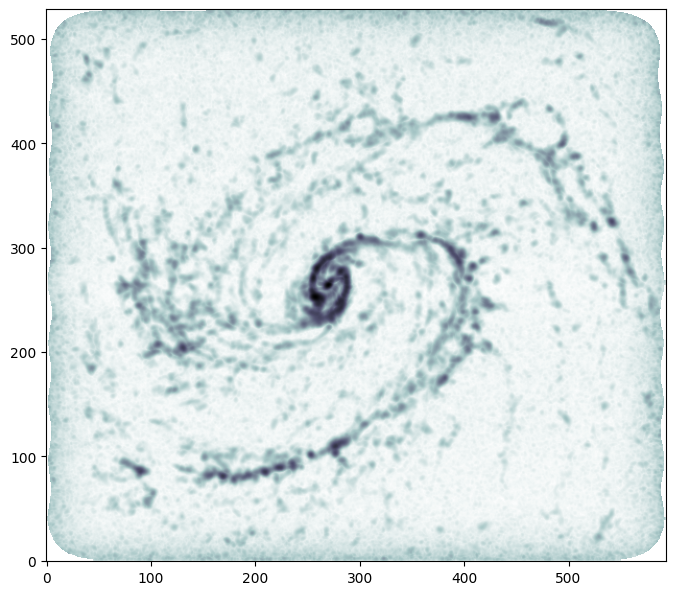

In [7]:
# first basic plot - mimic the same color map as Henshaw
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
norm = ImageNormalize(peak, interval=MinMaxInterval(), stretch=AsinhStretch())
ax.imshow(peak, origin='lower', norm=norm, cmap='bone_r')

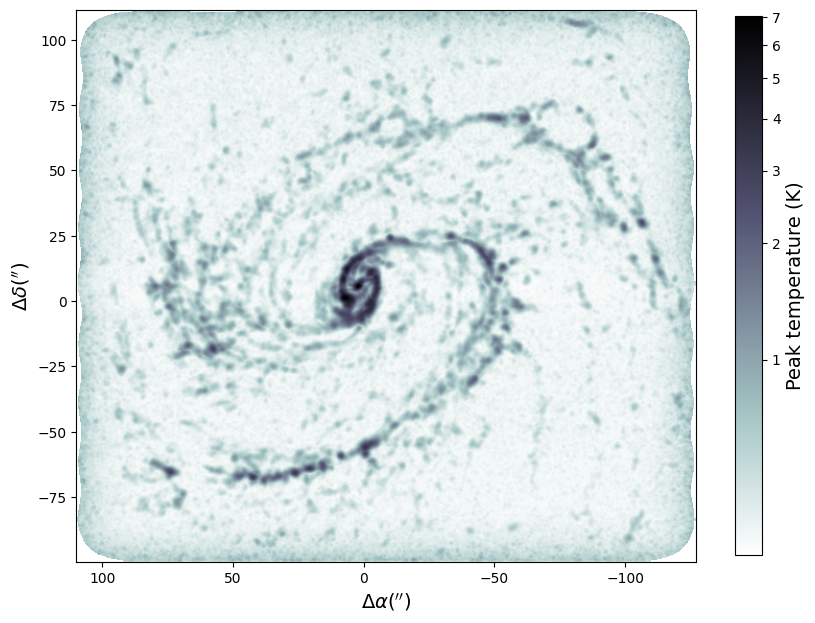

In [9]:
# plot again but now with offset equatorial coordinates rather than pixels
# and user-defined scaling with an intensity scalebar
ra  = (1 + np.arange(hd['NAXIS1']) - hd['CRPIX1']) * hd['CDELT1'] * 3600
dec = (1 + np.arange(hd['NAXIS2']) - hd['CRPIX2']) * hd['CDELT2'] * 3600
extent =[np.max(ra), np.min(ra), np.min(dec), np.max(dec)]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
norm = ImageNormalize(peak, interval=MinMaxInterval(), stretch=AsinhStretch())
p = ax.imshow(peak, origin='lower', norm=norm, cmap='bone_r', extent=extent)
ax.set_xlabel(r"$\Delta\alpha ('')$", fontsize=14)
ax.set_ylabel(r"$\Delta\delta ('')$", fontsize=14)

c = plt.colorbar(p, ax=ax, shrink=0.7)
c.set_label('Peak temperature (K)', fontsize=14)

### look at velocity structure